In [2]:
import numpy as np
import pandas as pd
import os, warnings, math
import time
import datetime
from functions_tony import count_uniq_miss
import matplotlib.pyplot as plt
import calendar
from pandas import Grouper
import random

In [5]:
train_df = pd.read_pickle('/home/antonio.correia/Documents/Kaggle/ASHRAE_energy/train_df.pkl')
test_df = pd.read_pickle('/home/antonio.correia/Documents/Kaggle/ASHRAE_energy/test_df.pkl')

In [6]:
df = pd.concat([train_df,test_df],axis=0)

In [7]:
df['unix_timestamp'] = pd.to_datetime(df['timestamp']).astype(int) / 10**9
df['unix_timestamp'] = df['unix_timestamp'].astype(np.int32)

In [8]:
train = (df['unix_timestamp'] < 1483228800)
test = (df['unix_timestamp'] >= 1483228800)

# Categorize fields

In [158]:
df.sample(5).T

,9026537,17076429,18027742,10466242,4292792
air_temperature,17.2,12.8,8.7,7.2,16.7
building_id,353,1386,795,465,856
cloud_coverage,NaN,4,NaN,NaN,0
dew_temperature,15.6,7.2,7.8,4.4,1.1
floor_count,NaN,NaN,6,NaN,1
meter,0,2,1,0,0
meter_reading,NaN,1328.62,NaN,NaN,1.3333
precip_depth_1_hr,0,NaN,NaN,0,0
primary_use,Education,Entertainment/public assembly,Education,Office,Entertainment/public assembly
row_id,9.02654e+06,NaN,1.80277e+07,1.04662e+07,NaN


In [9]:
id_fields = ['building_id','site_id']
categoricals = ['primary_use','year_built','floor_count','meter']
numericals = ['air_temperature',
              'cloud_coverage','meter_reading',
              'precip_depth_1_hr',
              'sea_level_pressure','square_feet','wind_direction','wind_speed']

# Check number of unique values and missing values

In [9]:
count_uniq_miss(df[id_fields])
count_uniq_miss(df[categoricals])

Column `building_id` has 1449 unique values and  0 values missing (0% of total).
Column `site_id` has 16 unique values and  0 values missing (0% of total).
Column `primary_use` has 16 unique values and  0 values missing (0% of total).
Column `year_built` has 116 unique values and 36725725 values missing (1% of total).
Column `floor_count` has 18 unique values and 51153487 values missing (1% of total).
Column `meter` has  4 unique values and  0 values missing (0% of total).


# Check category counts for categoricals

In [18]:
for f in categoricals:
    print("\033[1m" + f + "\033[0m")
    a = df[f].value_counts(dropna=False)
    b = df[f].value_counts(dropna=False,normalize=True)
    pd.concat([a,b],axis=1)
    print(' ')

primary_use


,primary_use,primary_use
Education,24967184,0.403258
Office,13400144,0.216433
Entertainment/public assembly,6977797,0.112702
Lodging/residential,6649053,0.107392
Public services,5079226,0.082037
Healthcare,1204447,0.019454
Other,750302,0.012119
Parking,651796,0.010527
Manufacturing/industrial,388513,0.006275
Food sales and service,341850,0.005521


 
year_built


,year_built,year_built
NaN,36725725,0.593176
1976.0,1599811,0.025839
1964.0,786337,0.012701
1966.0,683582,0.011041
2006.0,615294,0.009938
1975.0,576060,0.009304
1968.0,573307,0.009260
2007.0,562044,0.009078
1970.0,546584,0.008828
1967.0,540051,0.008723


 
floor_count


,floor_count,floor_count
NaN,51153487,0.826206
1.0,2931583,0.047350
2.0,2110172,0.034082
4.0,1070258,0.017286
3.0,1014968,0.016393
6.0,909798,0.014695
5.0,779456,0.012589
8.0,525658,0.008490
7.0,394235,0.006367
9.0,261616,0.004225


 
meter


,meter,meter
0,36816670,0.594645
1,12907400,0.208474
2,8385193,0.135434
3,3804437,0.061447


## for `year_built`, visualize categories

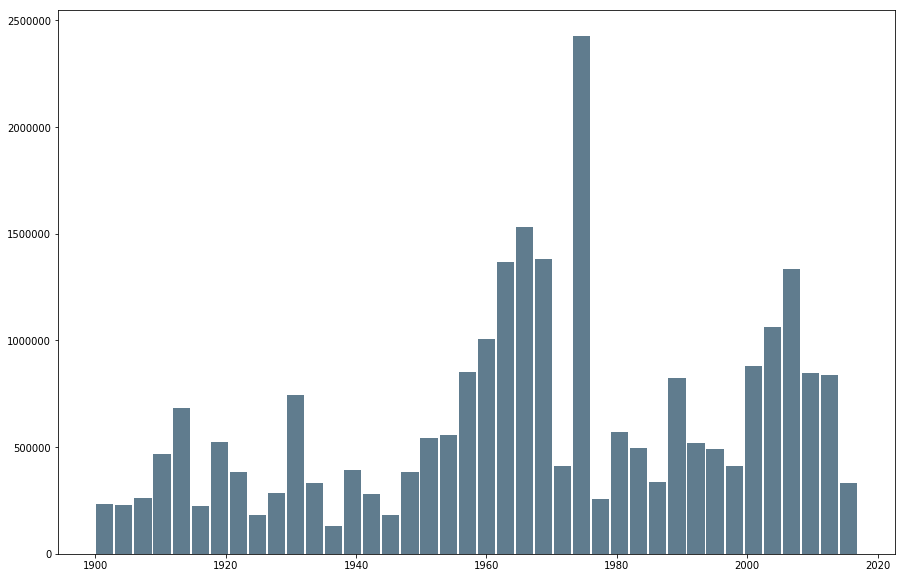

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = plt.hist(df['year_built'], bins=40, rwidth=0.9,color='#607c8e')

## for `meter`, check which buildings have what
 - 0: electricity
 - 1: chilledwater
 - 2: steam
 - 3: hotwater

In [35]:
df[['meter','building_id']].drop_duplicates().groupby(['meter']).count()

,building_id
meter,
0,1413
1,498
2,324
3,145


 - Check one example to see how different values between meters are
 - But first define a function to check which meters a building ID has

In [91]:
def check_meter(building_id):
    
    if type(building_id)==list or type(building_id)==range:
        n = pd.DataFrame([])
        for i in building_id:
            m = df[['building_id','meter']][df['building_id']==i].drop_duplicates()
            n = pd.concat([m,n],axis=0)
    else:
        n = df[['building_id','meter']][df['building_id']==building_id].drop_duplicates()
    return n.sort_values(by='building_id')

 - Even more easily, we can pivot the meter category

In [10]:
n = df[['building_id','meter']].drop_duplicates()
n = n.pivot(index='building_id',columns='meter',values='meter')

for i in range(0,4):
    n = n.replace(to_replace=i,value=1)
    
n = n.fillna(0)

for i in range(0,4):
    n[i] = n[i].astype(int)

In [144]:
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            for l in [0,1]:
                print('[0, 1, 2, 3]: ' + str([i,j,k,l]) +' '+ str(n[(n[0]==i) & (n[1]==j) & (n[2]==k) & (n[3]==l)][0].count())+' buildings.')

[0, 1, 2, 3]: [0, 0, 0, 0] 0 buildings.
[0, 1, 2, 3]: [0, 0, 0, 1] 0 buildings.
[0, 1, 2, 3]: [0, 0, 1, 0] 14 buildings.
[0, 1, 2, 3]: [0, 0, 1, 1] 0 buildings.
[0, 1, 2, 3]: [0, 1, 0, 0] 9 buildings.
[0, 1, 2, 3]: [0, 1, 0, 1] 0 buildings.
[0, 1, 2, 3]: [0, 1, 1, 0] 13 buildings.
[0, 1, 2, 3]: [0, 1, 1, 1] 0 buildings.
[0, 1, 2, 3]: [1, 0, 0, 0] 852 buildings.
[0, 1, 2, 3]: [1, 0, 0, 1] 21 buildings.
[0, 1, 2, 3]: [1, 0, 1, 0] 64 buildings.
[0, 1, 2, 3]: [1, 0, 1, 1] 0 buildings.
[0, 1, 2, 3]: [1, 1, 0, 0] 132 buildings.
[0, 1, 2, 3]: [1, 1, 0, 1] 111 buildings.
[0, 1, 2, 3]: [1, 1, 1, 0] 220 buildings.
[0, 1, 2, 3]: [1, 1, 1, 1] 13 buildings.


 - 852 buildings have meter 0
 - 220 buildings have meters 0, 1, 2
 - 132 buildings have meters 0, 1
 - 111 buildings have meters 0, 2, 3
 - 64 buildings have meters 0, 2
 - no building has only meter 3
 - only a few buildings (36) do not have meter 0
 - clearly meter 0 (electricity) is the most important source of readings

## How different are meter readings between different meters?

In [169]:
# which buildings have all meters?
all_meters = n[(n[0]==1) & (n[1]==1) & (n[2]==1) & (n[3]==1)].index.tolist()

# check their readings on a random timestamp to see how different are magnitudes
condition = (df['building_id'].isin(all_meters)) & (df['unix_timestamp']==1478376000)

df[['building_id','meter','meter_reading']][condition]\
.pivot(index='building_id',columns='meter',values='meter_reading')

meter,0,1,2,3
building_id,,,,
1232,249.880997,713.799988,0.000000,300.609985
1241,0.000000,1955.250000,1837.219971,0.460000
1249,347.000000,1545.760010,839.664001,568.393982
1258,922.437988,4121.000000,4940.790039,0.000000
1259,126.000000,653.465027,0.262800,637.747009
1293,77.003197,491.170990,428.324005,0.000000
1294,26.123199,134.093994,130.225998,0.242200
1295,146.802994,399.471008,962.616028,1.790600
1296,15.456200,182.923996,110.141998,0.136800


 - meter readings are quite different from each other in terms of magnitude for different meters

In [174]:
# check for a given timestamp different meters, this time in a broader group of buildings
condition0 = (df['unix_timestamp']==1478376000) & (df['building_id'].isin(n[(n[0]==1)].index.tolist()))
condition1 = (df['unix_timestamp']==1478376000) & (df['building_id'].isin(n[(n[1]==1)].index.tolist()))
condition2 = (df['unix_timestamp']==1478376000) & (df['building_id'].isin(n[(n[2]==1)].index.tolist()))
condition3 = (df['unix_timestamp']==1478376000) & (df['building_id'].isin(n[(n[3]==1)].index.tolist()))

df[['building_id','meter','meter_reading']][condition0]\
.pivot(index='building_id',columns='meter',values='meter_reading').sample(5)

df[['building_id','meter','meter_reading']][condition1]\
.pivot(index='building_id',columns='meter',values='meter_reading').sample(5)

df[['building_id','meter','meter_reading']][condition2]\
.pivot(index='building_id',columns='meter',values='meter_reading').sample(5)

df[['building_id','meter','meter_reading']][condition3]\
.pivot(index='building_id',columns='meter',values='meter_reading').sample(5)

meter,0,1,2,3
building_id,,,,
107,86.000000,NaN,NaN,NaN
404,158.250000,NaN,NaN,NaN
982,112.000000,NaN,NaN,NaN
429,10.760000,NaN,NaN,NaN
1064,195.395004,NaN,NaN,NaN


meter,0,1,2,3
building_id,,,,
1158,196.959,0.000000,5781.250000,NaN
886,105.000,410.311005,70.150002,NaN
1169,464.000,307.209991,2523.439941,NaN
878,36.000,100.089996,9.150000,NaN
883,440.000,787.669006,NaN,NaN


meter,0,1,2,3
building_id,,,,
1387,181.699997,NaN,772.357971,NaN
955,910.000000,930.101013,286.700012,NaN
1307,99.538597,303.000000,90.211403,NaN
1437,551.450012,NaN,851.395020,NaN
989,99.000000,234.011002,39.650002,NaN


meter,0,1,2,3
building_id,,,,
112,90.375000,NaN,NaN,0.000000
216,129.479996,118.166000,NaN,0.000000
200,166.369995,290.667999,NaN,0.000000
1011,NaN,NaN,NaN,0.000000
1298,417.265991,2776.419922,2132.590088,87.336197


 - given the nature of readings, it could make more sense to estimate changes in readings since previous timestamp
 - should it be percentage changes or absolute changes?
 - first check how a given meter reading evolves over time
 - pick a random meter and building id to check this

In [87]:
def check_random_readings(meter, start_time, num_hours):
    building = random.choice(n[(n[meter]==1)].index.tolist())
    condition = (df['meter']==meter) & (df['building_id']==building) & (df['timestamp']>=start_time)
    return df[condition][['timestamp','site_id','air_temperature','building_id','primary_use','meter','meter_reading']][0:num_hours]

def check_building_readings(building, meter, start_time, num_hours):
    condition = (df['meter']==meter) & (df['building_id']==building) & (df['timestamp']>=start_time)
    return df[condition][['timestamp','site_id','air_temperature','building_id','primary_use','meter','meter_reading']][0:num_hours]

In [97]:
check_random_readings(1,'2016-05-20 00:00:00',24)

,timestamp,site_id,air_temperature,building_id,primary_use,meter,meter_reading
7536745,2016-05-20 00:00:00,15,13.3,1394,Entertainment/public assembly,1,0.000000
7539088,2016-05-20 01:00:00,15,12.2,1394,Entertainment/public assembly,1,0.000000
7541432,2016-05-20 02:00:00,15,7.8,1394,Entertainment/public assembly,1,0.000000
7543779,2016-05-20 03:00:00,15,6.7,1394,Entertainment/public assembly,1,0.000000
7546124,2016-05-20 04:00:00,15,5.0,1394,Entertainment/public assembly,1,0.000000
7548468,2016-05-20 05:00:00,15,5.0,1394,Entertainment/public assembly,1,0.000000
7550814,2016-05-20 06:00:00,15,3.3,1394,Entertainment/public assembly,1,0.000000
7553161,2016-05-20 07:00:00,15,5.6,1394,Entertainment/public assembly,1,0.000000
7555508,2016-05-20 08:00:00,15,3.9,1394,Entertainment/public assembly,1,0.000000
7557855,2016-05-20 09:00:00,15,3.9,1394,Entertainment/public assembly,1,2.086900


In [94]:
check_building_readings(1083,0,'2016-06-04 00:00:00',24)

,timestamp,site_id,air_temperature,building_id,primary_use,meter,meter_reading
8379514,2016-06-04 00:00:00,13,18.9,1083,Education,0,167.376007
8381859,2016-06-04 01:00:00,13,20.0,1083,Education,0,166.800995
8384204,2016-06-04 02:00:00,13,19.4,1083,Education,0,162.281998
8386549,2016-06-04 03:00:00,13,18.9,1083,Education,0,155.610992
8388892,2016-06-04 04:00:00,13,18.3,1083,Education,0,154.304001
8391238,2016-06-04 05:00:00,13,17.8,1083,Education,0,155.513000
8393581,2016-06-04 06:00:00,13,17.2,1083,Education,0,152.787994
8395925,2016-06-04 07:00:00,13,16.7,1083,Education,0,154.147003
8398268,2016-06-04 08:00:00,13,16.7,1083,Education,0,160.320007
8400609,2016-06-04 09:00:00,13,16.1,1083,Education,0,163.268005


 - building 865 always seems to have the same reading throughout the day
 - we should check whether there are other buildings in the same situation

# Check distributions for numerical variables

## `meter_reading`

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
ts = df.set_index('timestamp')

In [8]:
# to plot a random building or site id
def ts_plot_random(num,id_f,site=False):
    
    try:
        n_id = np.random.randint(int(ts[id_f].max()))
    except:
        cats = list(ts[id_f].unique())
        n_id = random.choice(cats)
        
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
        
    if site:
        fig.suptitle(print(str(num)+' for '+str(id_f)+' = '+str(n_id)), fontsize=16)
        axes = ts[ts[id_f]==n_id].groupby(['timestamp'])[num].median().plot()
    else:
        use = ts[ts[id_f]==n_id]['primary_use'][0]
        fig.suptitle(print(str(num)+' for '+str(id_f)+' = '+str(n_id)+', primary use: '+str(use)), fontsize=16)
        axes = ts[ts[id_f]==n_id][num].plot()

meter_reading for building_id = 1169, primary use: Education


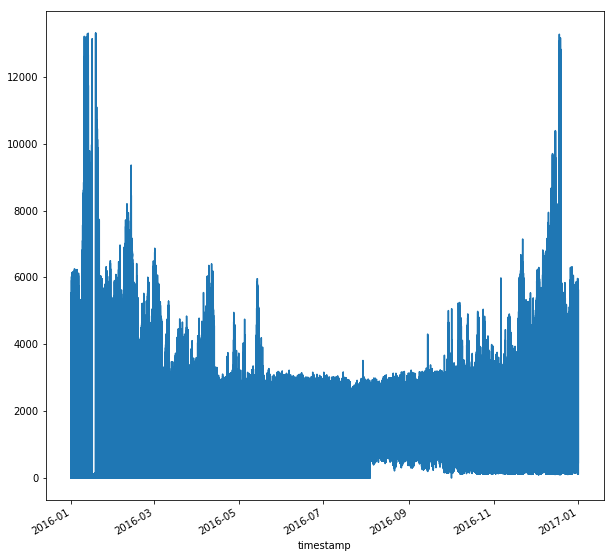

In [88]:
ts_plot_random('meter_reading','building_id')

meter_reading for site_id = 13


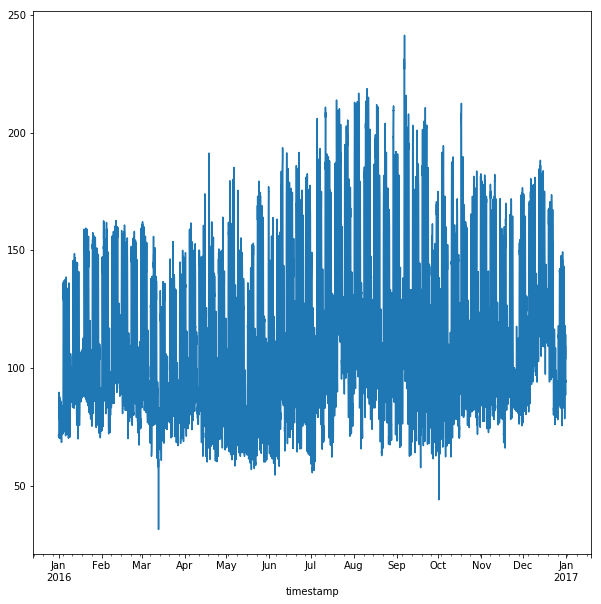

In [89]:
ts_plot_random('meter_reading','site_id',site=True)

air_temperature for site_id = 11


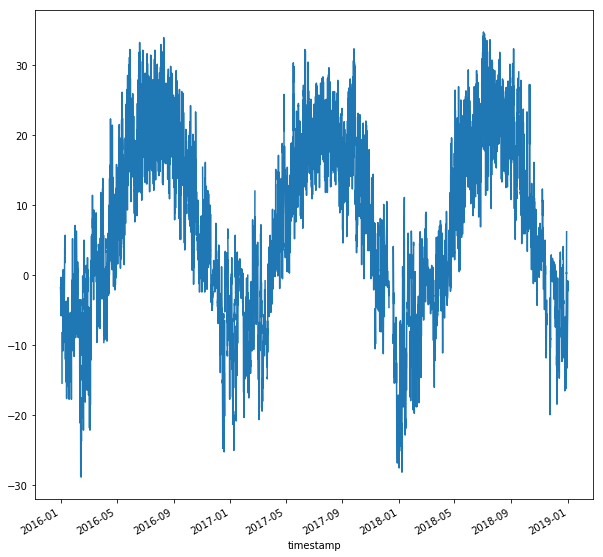

In [91]:
ts_plot_random('air_temperature','site_id',site=True)

meter_reading for primary_use = Manufacturing/industrial


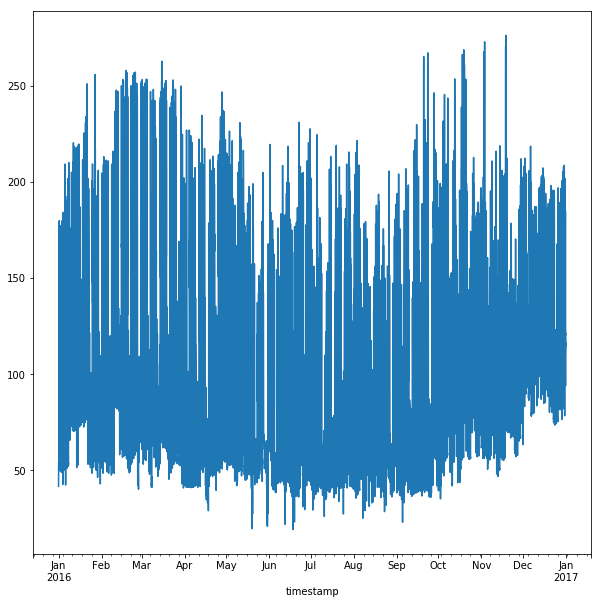

In [90]:
ts_plot_random('meter_reading','primary_use',site=True)

# Check correlations (TBD)

## Meter readings across buildings in the same site_id